In [1]:
!yolo predict model=yolov8n.pt save=True source = 'C:\\Users\\luepo\\OneDrive\\Desktop\\CV_workshop\\17\\images\\bus.jpg'

Ultralytics 8.3.152  Python-3.12.7 torch-2.7.1+cpu CPU (Intel Core(TM) i9-14900HX)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 C:\Users\luepo\OneDrive\Desktop\CV_workshop\17\images\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 236.2ms
Speed: 2.4ms preprocess, 236.2ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\detect\predict7
 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.predict('C:\\Users\\luepo\\OneDrive\\Desktop\\CV_workshop\\17\\images\\bus.jpg', save=True)


image 1/1 C:\Users\luepo\OneDrive\Desktop\CV_workshop\17\images\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 210.8ms
Speed: 2.9ms preprocess, 210.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\detect\predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

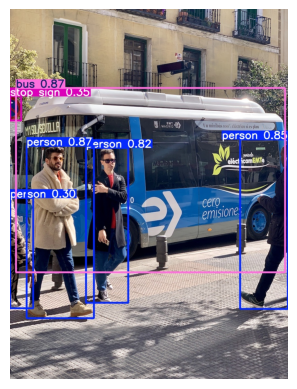

In [9]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('C:\\Users\\luepo\\OneDrive\\Desktop\\CV_workshop\\17\\runs\\detect\\predict2\\bus.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # แปลง BGR -> RGB

plt.imshow(img)
plt.axis('off')
plt.show()

### Detect object from Video

In [4]:
from ultralytics import YOLO
import cv2

model = YOLO('yolov8n.pt')

cap = cv2.VideoCapture('C:\\Users\\luepo\\OneDrive\\Desktop\\CV_workshop\\17\\images\\test2.mp4')  

cv2.namedWindow('Video Detection', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Video Detection', 800, 600)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame, stream=True)

    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cls = int(box.cls[0])
            label = model.names[cls]
            conf = box.conf[0]

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"{label} {conf:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    cv2.imshow('Video Detection', frame)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 5 persons, 8 cars, 3 motorcycles, 261.0ms
Speed: 5.5ms preprocess, 261.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 8 cars, 2 motorcycles, 235.9ms
Speed: 1.8ms preprocess, 235.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 8 cars, 2 motorcycles, 251.8ms
Speed: 2.1ms preprocess, 251.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 8 cars, 2 motorcycles, 243.5ms
Speed: 2.8ms preprocess, 243.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 8 cars, 2 motorcycles, 263.6ms
Speed: 2.4ms preprocess, 263.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 8 cars, 2 motorcycles, 214.8ms
Speed: 2.2ms preprocess, 214.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 8 cars, 2 motorcycles, 206.5ms
Speed: 1.8ms preprocess, 206.5ms i

### Filtering 'Car' and 'Motorcycle'

In [6]:
from ultralytics import YOLO
import cv2

model = YOLO('yolov8n.pt')

cap = cv2.VideoCapture('C:\\Users\\luepo\\OneDrive\\Desktop\\CV_workshop\\17\\images\\test2.mp4')  

cv2.namedWindow('Video Detection', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Video Detection', 800, 600)

target_classes = ['car', 'motorcycle']    ## define selected labels

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame, stream=True)

    for r in results:
        for box in r.boxes:
            cls = int(box.cls[0])      ## pick up label
            label = model.names[cls]   ## decode label 

            if label in target_classes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cls = int(box.cls[0])
                label = model.names[cls]
                conf = box.conf[0]

                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, f"{label} {conf:.2f}", (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    cv2.imshow('Video Detection', frame)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 5 persons, 8 cars, 3 motorcycles, 285.8ms
Speed: 2.1ms preprocess, 285.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 8 cars, 2 motorcycles, 237.2ms
Speed: 2.5ms preprocess, 237.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 8 cars, 2 motorcycles, 194.8ms
Speed: 1.9ms preprocess, 194.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 8 cars, 2 motorcycles, 262.8ms
Speed: 2.1ms preprocess, 262.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 8 cars, 2 motorcycles, 194.0ms
Speed: 2.5ms preprocess, 194.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 8 cars, 2 motorcycles, 160.2ms
Speed: 2.1ms preprocess, 160.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 8 cars, 2 motorcycles, 150.3ms
Speed: 2.8ms preprocess, 150.3ms i

### Detect Object from WebCam

In [7]:
from ultralytics import YOLO
import cv2

model = YOLO('yolov8n.pt')

cap = cv2.VideoCapture(0)              ## source = 0 for webcam

cv2.namedWindow('Webcam', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Webcam', 600, 400)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame, stream=True)

    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cls = int(box.cls[0])
            label = model.names[cls]
            conf = box.conf[0]

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"{label} {conf:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    cv2.imshow('Webcam', frame)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 1 person, 286.5ms
Speed: 2.8ms preprocess, 286.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 256.3ms
Speed: 2.8ms preprocess, 256.3ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 262.0ms
Speed: 2.5ms preprocess, 262.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 241.7ms
Speed: 2.1ms preprocess, 241.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 281.1ms
Speed: 2.6ms preprocess, 281.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 283.9ms
Speed: 2.7ms preprocess, 283.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 282.0ms
Speed: 2.8ms preprocess, 282.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 272.2ms
Speed: 2.7ms preprocess, 272.2ms inference, 2.1ms postprocess per image at

### Write output videos

In [ ]:
from ultralytics import YOLO
import cv2

model = YOLO('yolov8n.pt')

cap = cv2.VideoCapture('C:\\Users\\luepo\\OneDrive\\Desktop\\CV_workshop\\17\\images\\test2.mp4')

# Get input video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))    ### get width and height of video
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)                         ## get framerate of video 

# Define VideoWriter to save output video
output_path = 'output_detected.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')     ## format mp4
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))   ## set output video

cv2.namedWindow('Video Detection', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Video Detection', 800, 600)

target_classes = ['car', 'motorcycle']

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame, stream=True)

    for r in results:
        for box in r.boxes:
            cls = int(box.cls[0])
            label = model.names[cls]

            if label in target_classes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                conf = box.conf[0]

                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, f"{label} {conf:.2f}", (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    cv2.imshow('Video Detection', frame)
    out.write(frame)                    # Write the processed frame to the output video

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()



0: 384x640 5 persons, 8 cars, 3 motorcycles, 240.8ms
Speed: 3.5ms preprocess, 240.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 8 cars, 2 motorcycles, 196.7ms
Speed: 2.3ms preprocess, 196.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 8 cars, 2 motorcycles, 253.7ms
Speed: 2.5ms preprocess, 253.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 8 cars, 2 motorcycles, 243.2ms
Speed: 2.6ms preprocess, 243.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 8 cars, 2 motorcycles, 187.0ms
Speed: 2.1ms preprocess, 187.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 8 cars, 2 motorcycles, 206.4ms
Speed: 2.6ms preprocess, 206.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 8 cars, 2 motorcycles, 189.5ms
Speed: 2.4ms preprocess, 189.5ms i